In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [13]:
!pwd

/Users/slava/temp


In [9]:
!ls cats_and_dogs_filtered/

train        validation   vectorize.py


In [6]:
train_dir = "/Users/slava/temp/cats_and_dogs_filtered/train/"
valid_dir = "/Users/slava/temp/cats_and_dogs_filtered/validation/"

In [3]:
BATCH_SIZE = 50
IMG_SHAPE  = 150

In [47]:
image_gen_aug = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,  # максимальный угол поворота
      width_shift_range=0.2, # смещение максимум на 20% ширины по горизонтали
      height_shift_range=0.2, # смещение максимум на 20% высоты по вертикали
      zoom_range=0.2, # картинка будет увеличена или уменьшена не более чем на 20% 
      horizontal_flip=True, # случайное отражение по горизонтали
      fill_mode="nearest", # чем заполнять пробелы -- сначала выберем черный цвет, а потом изменим на "nearest"
      )
train_data_gen = image_gen_aug.flow_from_directory(
      train_dir, 
      target_size=(IMG_SHAPE, IMG_SHAPE), 
      class_mode="binary",
      batch_size=BATCH_SIZE
     )

valid_data_gen = image_gen_aug.flow_from_directory(
      valid_dir, 
      target_size=(IMG_SHAPE, IMG_SHAPE), 
      class_mode="binary",
      batch_size=BATCH_SIZE
     )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [48]:
sample_train_data_gen, sample_labels = next(train_data_gen)

In [49]:
sample_train_data_gen[0]

array([[[0.8235295 , 0.81568635, 0.8196079 ],
        [0.82670665, 0.8188635 , 0.8227851 ],
        [0.8314931 , 0.82364994, 0.8275715 ],
        ...,
        [0.5567868 , 0.5685515 , 0.5254142 ],
        [0.6267336 , 0.6365077 , 0.60531443],
        [0.6141655 , 0.6207096 , 0.61019456]],

       [[0.8235295 , 0.81568635, 0.8196079 ],
        [0.8235295 , 0.81568635, 0.8196079 ],
        [0.8235295 , 0.81568635, 0.8196079 ],
        ...,
        [0.63207716, 0.64384186, 0.6007046 ],
        [0.6077129 , 0.6166944 , 0.5902564 ],
        [0.6347712 , 0.6405229 , 0.6355555 ]],

       [[0.8345862 , 0.8184505 , 0.83895725],
        [0.83139527, 0.8176528 , 0.83337307],
        [0.82820433, 0.816855  , 0.8277889 ],
        ...,
        [0.6662089 , 0.6776278 , 0.63656574],
        [0.5886922 , 0.59688115, 0.57519835],
        [0.655377  , 0.6603361 , 0.6609165 ]],

       ...,

       [[0.5882039 , 0.3962304 , 0.62453145],
        [0.47414896, 0.34841695, 0.5392831 ],
        [0.5105453 , 0

Text(0.5, 1.0, 'Dog = 1')

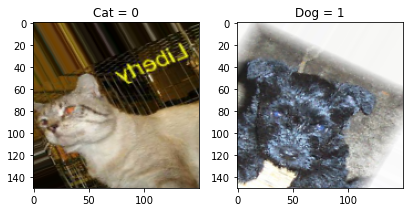

In [53]:
plt.figure(figsize=(14,14))
plt.subplot(4,4, 1)
plt.imshow(sample_train_data_gen[10])
plt.title('Cat = ' + str(sample_labels[10].astype('int32')))
plt.subplot(4,4, 2)
plt.imshow(sample_train_data_gen[11])
plt.title('Dog = ' + str(sample_labels[11].astype('int32')))

In [54]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# model.add(tf.keras.layers.GlobalAveragePooling2D())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [57]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 41472)            

In [59]:
EPOCHS = 20
history = model.fit(
    train_data_gen,
    epochs=EPOCHS,
    validation_data=valid_data_gen)

Epoch 1/20
40/40 [==============================] - 41s 1s/step - loss: 0.8646 - accuracy: 0.5275 - val_loss: 0.6865 - val_accuracy: 0.6080
Epoch 2/20
40/40 [==============================] - 42s 1s/step - loss: 0.6836 - accuracy: 0.5530 - val_loss: 0.6624 - val_accuracy: 0.6060
Epoch 3/20
40/40 [==============================] - 44s 1s/step - loss: 0.6736 - accuracy: 0.5510 - val_loss: 0.6747 - val_accuracy: 0.6170
Epoch 4/20
40/40 [==============================] - 53s 1s/step - loss: 0.6536 - accuracy: 0.6155 - val_loss: 0.6410 - val_accuracy: 0.6200
Epoch 5/20
40/40 [==============================] - 53s 1s/step - loss: 0.6239 - accuracy: 0.6430 - val_loss: 0.6367 - val_accuracy: 0.6260
Epoch 6/20
40/40 [==============================] - 48s 1s/step - loss: 0.6187 - accuracy: 0.6540 - val_loss: 0.6187 - val_accuracy: 0.6460
Epoch 7/20
40/40 [==============================] - 48s 1s/step - loss: 0.5912 - accuracy: 0.6755 - val_loss: 0.6114 - val_accuracy: 0.6600
Epoch 8/20
40/40 [==

In [60]:
sample_validation_images, sample_validation_labels = next(valid_data_gen)
predicted = model.predict(sample_validation_images).flatten()

In [61]:
sample_validation_images

array([[[[0.04473387, 0.04473387, 0.04473387],
         [0.04343599, 0.04343599, 0.04343599],
         [0.04013984, 0.04013984, 0.04013984],
         ...,
         [0.09375674, 0.09375674, 0.09375674],
         [0.07785401, 0.07785401, 0.07785401],
         [0.08628902, 0.08628902, 0.08628902]],

        [[0.04705883, 0.04705883, 0.04705883],
         [0.04705883, 0.04705883, 0.04705883],
         [0.04597927, 0.04597927, 0.04597927],
         ...,
         [0.08902428, 0.08902428, 0.08902428],
         [0.07735281, 0.07735281, 0.07735281],
         [0.09019608, 0.09019608, 0.09019608]],

        [[0.04705883, 0.04705883, 0.04705883],
         [0.04705883, 0.04705883, 0.04705883],
         [0.04705883, 0.04705883, 0.04705883],
         ...,
         [0.08212633, 0.08212633, 0.08212633],
         [0.08287115, 0.08287115, 0.08287115],
         [0.09019608, 0.09019608, 0.09019608]],

        ...,

        [[0.8550061 , 0.8092371 , 0.8085922 ],
         [0.80894643, 0.7704047 , 0.7661461 ]

In [62]:
sample_validation_labels = sample_validation_labels.astype("int32")
sample_validation_labels

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1], dtype=int32)

In [63]:
predicted

array([0.2570488 , 0.07611984, 0.96682495, 0.6490706 , 0.1713827 ,
       0.23719361, 0.1962277 , 0.5296086 , 0.37361026, 0.5043481 ,
       0.327217  , 0.3022216 , 0.09968808, 0.3620292 , 0.5254502 ,
       0.8525611 , 0.88170683, 0.51977265, 0.6097048 , 0.13144335,
       0.65749526, 0.39317775, 0.58588886, 0.57379943, 0.14904997,
       0.06592992, 0.31867296, 0.9761337 , 0.49547672, 0.83155596,
       0.9768442 , 0.12943861, 0.43003237, 0.30059218, 0.33858004,
       0.4632795 , 0.87181497, 0.07637382, 0.37141907, 0.41298467,
       0.18303522, 0.3175692 , 0.3186115 , 0.45604113, 0.42109296,
       0.70167637, 0.66841465, 0.477884  , 0.35215953, 0.69148666],
      dtype=float32)

In [64]:
predicted = (predicted > 0.5).astype("int32")
predicted

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1], dtype=int32)

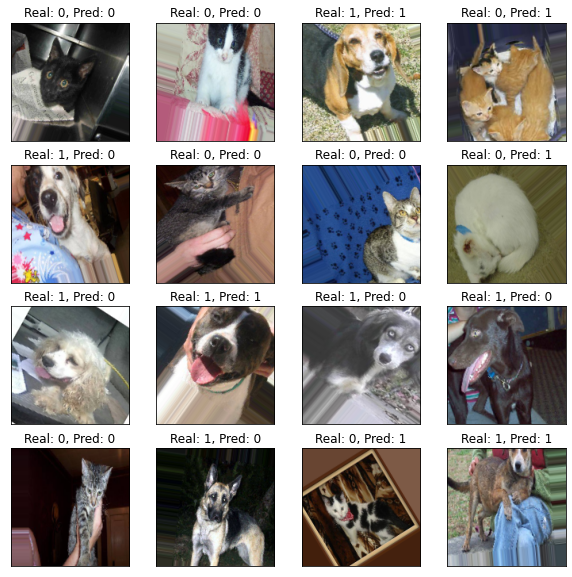

In [65]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.title(f"Real: {sample_validation_labels[i]}, Pred: {predicted[i]}")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(sample_validation_images[i])